In [1]:
import os
os.chdir("/home/guest_dyw/diffusion-sampler/")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
import torch

import numpy as np

In [3]:
from eval.util import load_all_from_experiment_path

PATH = "/home/guest_dyw/diffusion-sampler/results/outputs/2024-08-13/15-36-06"

energy, model, trainer, plotter = load_all_from_experiment_path(PATH)

model.to('cuda:0')

print("Load model from", PATH)

Load model from /home/guest_dyw/diffusion-sampler/results/outputs/2024-08-13/15-36-06


In [4]:
from trainer.buffer.prioritized_buffer import LogitSampler, RewardPrioritizedReplayBuffer

In [22]:
buffer = RewardPrioritizedReplayBuffer(60000, 'cpu', energy.log_reward, 300, 32)

In [23]:
sample = model.sample(6000).detach().cpu()
log_reward = energy.log_reward(sample).detach().cpu()

In [24]:
buffer.add(sample, log_reward)

(<Figure size 1200x2000 with 6 Axes>,
 array([[<Axes: title={'center': 'Projected on x0, x2'}, xlabel='x0', ylabel='x2'>,
         <Axes: title={'center': 'Projected on x1, x2'}, xlabel='x1', ylabel='x2'>],
        [<Axes: title={'center': 'Projected on x2, x4'}, xlabel='x2', ylabel='x4'>,
         <Axes: title={'center': 'Projected on x3, x4'}, xlabel='x3', ylabel='x4'>],
        [<Axes: title={'center': 'Projected on x4, x6'}, xlabel='x4', ylabel='x6'>,
         <Axes: title={'center': 'Projected on x5, x6'}, xlabel='x5', ylabel='x6'>]],
       dtype=object))

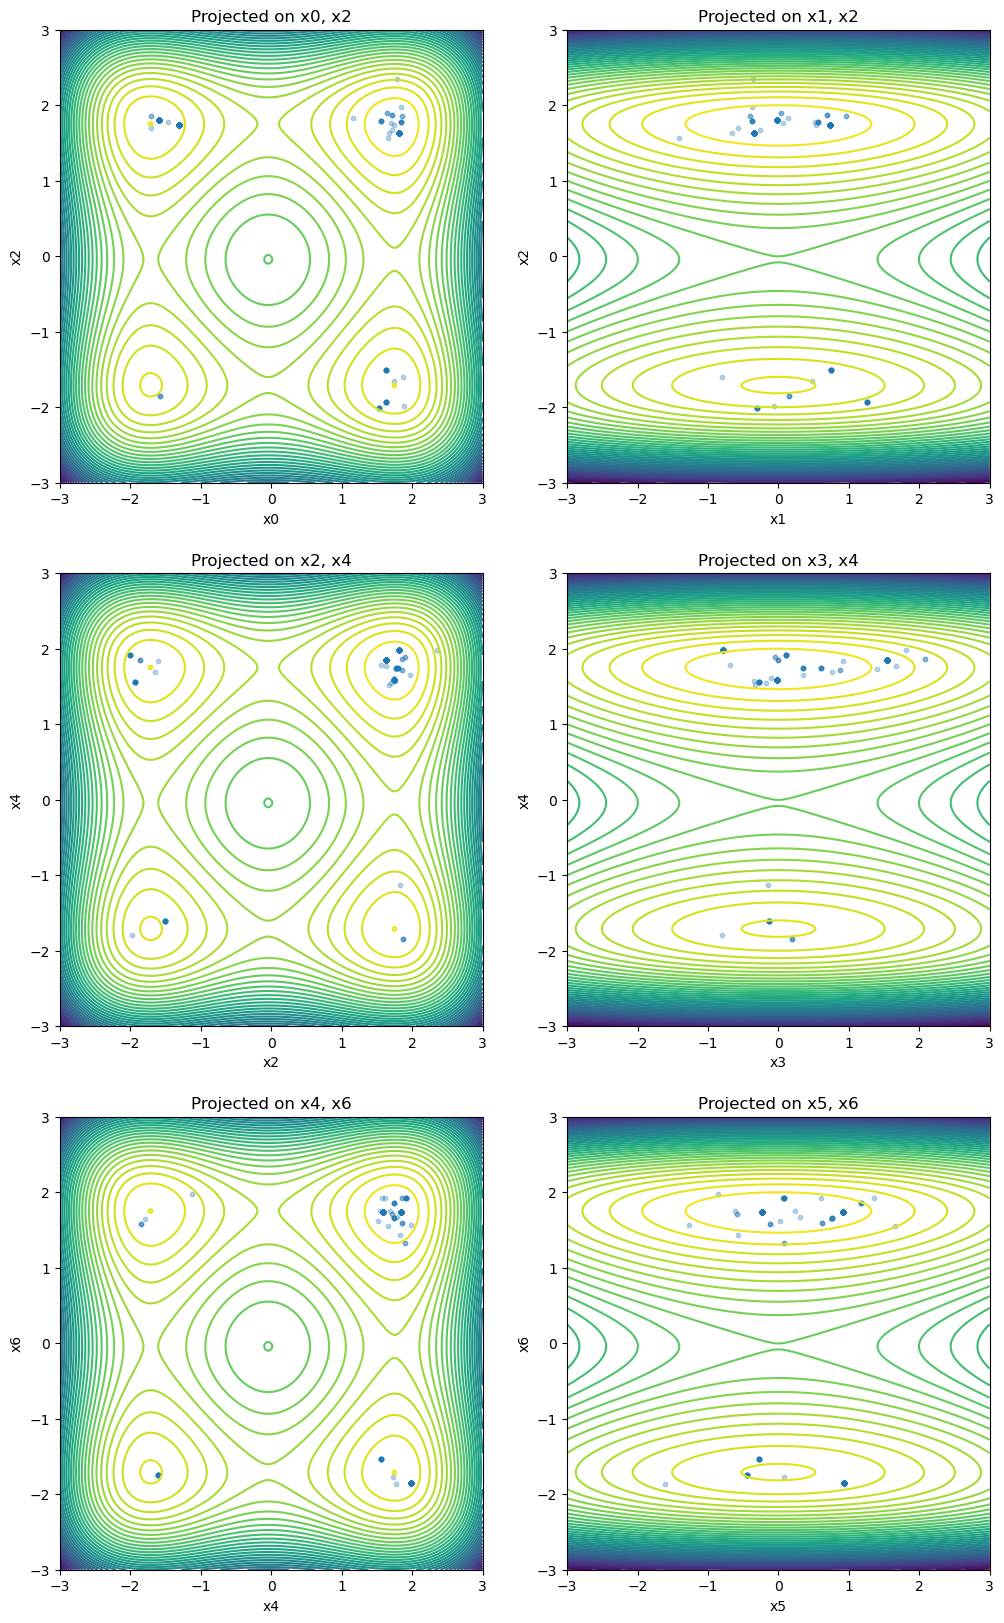

In [25]:
state, reward = buffer.sample()

plotter.make_sample_plot(state)